In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


In [49]:
df = pd.read_csv("fraud_dataset.csv")


In [50]:
df.head()

,transaction_id,timestamp,amount,merchant_category,customer_id,customer_age,customer_location,device_type,previous_transactions,is_fraud
0,916306a3-f7e2-4371-992a-38ab8030b680,1/2/2022 6:53,46.93,fuel,bef45806-a255-4cdb-a45e-012d533eee34,48,NY,tablet,2,0
1,2d922a41-edd9-4649-81f0-c599db4b923d,9/5/2024 14:18,301.01,electronics,f600bad0-d244-42c4-9db3-1115214dd1c4,58,IL,mobile,4,0
2,9d2ec6cd-f8ed-4c68-9ec7-1450c30b7fe0,12/7/2022 6:24,131.67,entertainment,050c0996-fd20-4ce0-94ec-b1bbc1f3c229,23,TX,tablet,2,0
3,f65f1e63-1b91-4a79-95e4-4dd825992461,8/19/2022 3:58,91.29,fashion,71693a5a-7103-4876-9e03-0fcb64ba3e28,69,FL,desktop,6,0
4,e6a8161d-4fdc-4483-9b61-2c8c86567e78,4/19/2023 12:55,16.96,fashion,18ed5ca8-d0eb-4ccf-b4d3-fa37f15b89c7,48,TX,tablet,0,0


In [51]:
print(df.isnull().sum())

transaction_id           0
timestamp                0
amount                   0
merchant_category        0
customer_id              0
customer_age             0
customer_location        0
device_type              0
previous_transactions    0
is_fraud                 0
dtype: int64


In [52]:
df.tail()

,transaction_id,timestamp,amount,merchant_category,customer_id,customer_age,customer_location,device_type,previous_transactions,is_fraud
9995,1e8f4cd7-4c65-4ba9-8615-b290fed56c2b,2/4/2023 22:07,194.95,entertainment,109df67b-d4ac-4ad4-b2de-1de1b0567d70,62,TX,mobile,2,0
9996,c6ffd8d5-6218-488a-872c-f31074ce3271,10/18/2023 14:09,227.80,grocery,3ceedb99-c0f7-4353-99ae-cfe12499ba27,23,FL,tablet,6,0
9997,59158647-3438-40e4-bbcc-b17172f5889a,10/22/2022 17:34,293.20,grocery,7e71ac9b-4c40-4171-8ade-3a84153edd91,68,CA,desktop,1,0
9998,24cdd0fb-0517-4541-814a-d31baf771da8,3/30/2024 22:47,50.66,electronics,ea205d4e-6550-406c-ac9e-739a43e58813,29,IL,tablet,6,0
9999,aeb1f384-51a7-424e-a231-c5e546a98c85,10/27/2023 6:48,24.48,entertainment,719002a8-592e-4244-bddb-1ecadfd9fa65,48,NY,tablet,3,0


In [53]:
df.shape

(10000, 10)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  object 
 1   timestamp              10000 non-null  object 
 2   amount                 10000 non-null  float64
 3   merchant_category      10000 non-null  object 
 4   customer_id            10000 non-null  object 
 5   customer_age           10000 non-null  int64  
 6   customer_location      10000 non-null  object 
 7   device_type            10000 non-null  object 
 8   previous_transactions  10000 non-null  int64  
 9   is_fraud               10000 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [55]:
 df.duplicated().sum()

0

In [56]:
df.nunique()

transaction_id           10000
timestamp                 9966
amount                    7985
merchant_category            5
customer_id              10000
customer_age                52
customer_location            5
device_type                  3
previous_transactions       13
is_fraud                     2
dtype: int64

In [57]:
categorical_columns = df.select_dtypes(include='object').columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['transaction_id', 'timestamp', 'merchant_category', 'customer_id',
       'customer_location', 'device_type'],
      dtype='object')


In [58]:
df.dtypes

transaction_id            object
timestamp                 object
amount                   float64
merchant_category         object
customer_id               object
customer_age               int64
customer_location         object
device_type               object
previous_transactions      int64
is_fraud                   int64
dtype: object

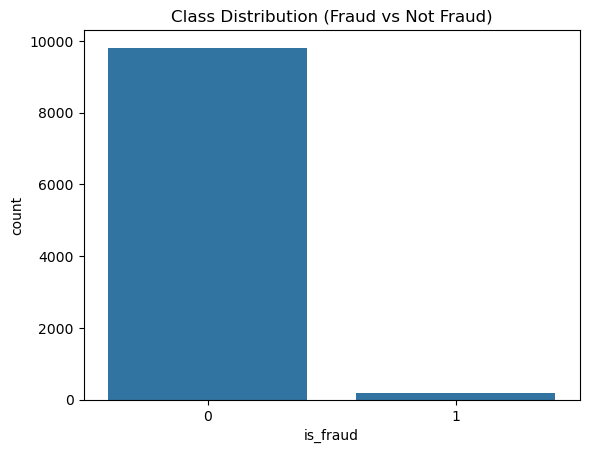

In [59]:
sns.countplot(data=df, x='is_fraud')  # Change this column if your fraud label has a different name
plt.title("Class Distribution (Fraud vs Not Fraud)")
plt.show()

In [60]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [61]:
print("Encoded data shape:", df_encoded.shape)
print(df_encoded.head())

Encoded data shape: (10000, 29977)
   amount  customer_age  previous_transactions  is_fraud  \
0   46.93            48                      2         0   
1  301.01            58                      4         0   
2  131.67            23                      2         0   
3   91.29            69                      6         0   
4   16.96            48                      0         0   

   transaction_id_000d2ab6-903b-44b4-bbf4-445eb479d192  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   transaction_id_001a816c-3a73-4b34-bc47-893f43d9b68b  \
0                                              False     
1                                              False     
2                                              False     
3                      

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [63]:
X = df_encoded.drop('is_fraud', axis=1)
y = df_encoded['is_fraud']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1972
           1       0.00      0.00      0.00        28

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000



C:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

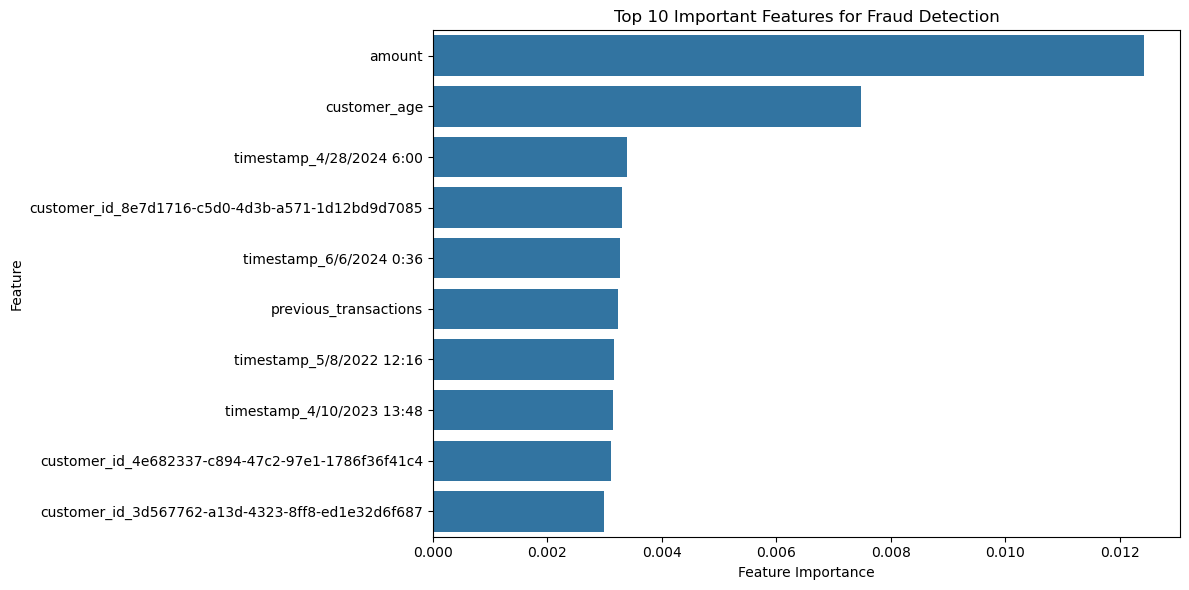

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # top 10
plt.title('Top 10 Important Features for Fraud Detection')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [71]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1972
           1       0.00      0.00      0.00        28

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.97      0.99      0.98      2000



C:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Khushi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


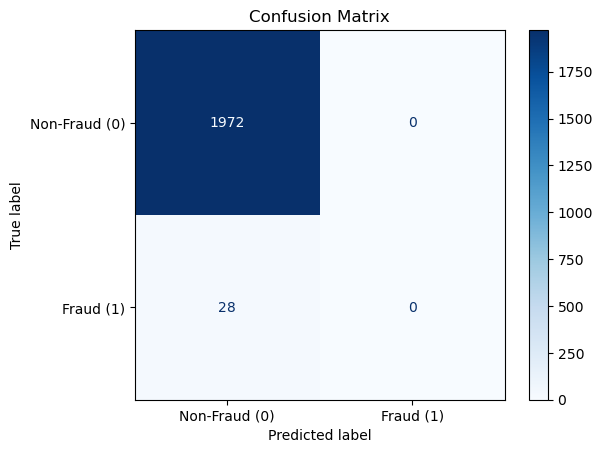

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud (0)', 'Fraud (1)'])
disp.plot(cmap='Blues')  
plt.title("Confusion Matrix")
plt.show()
